In [1]:
#importing all the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as seabornInstance 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix

In [2]:
#reading the data from file using pandas dataframe

life_expectancy_train_file = pd.read_csv("s3://rmit-ml-2020s1-lab-data/Assignment1_data/train.csv")


In [3]:
#drop id column from both train and test dataset
life_expectancy_train_file = life_expectancy_train_file.drop(['ID'], axis=1)


In [4]:
#assigning the values to X and y variables.
#dropping the target variable in X.
#assigning target variable to y.

X = pd.DataFrame(life_expectancy_train_file)
X.drop('TARGET_LifeExpectancy', axis=1, inplace=True)
y = pd.Series(life_expectancy_train_file['TARGET_LifeExpectancy'])

<Figure size 432x288 with 0 Axes>

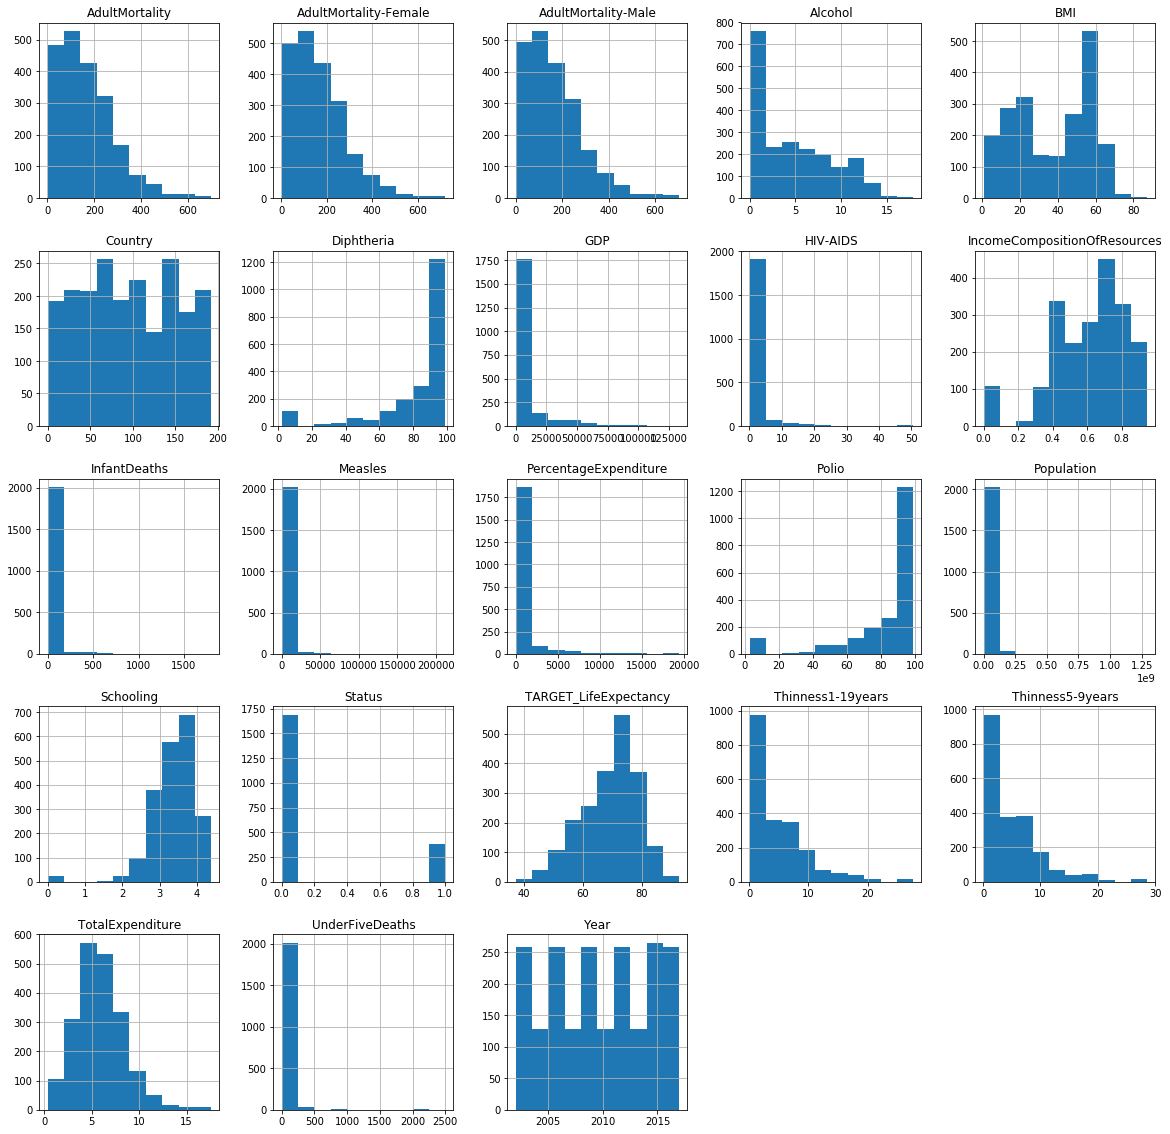

In [5]:
#checking the distribution of data using histogram

plt.figure()
life_expectancy_train_file.hist(figsize=(20,20))
plt.show()

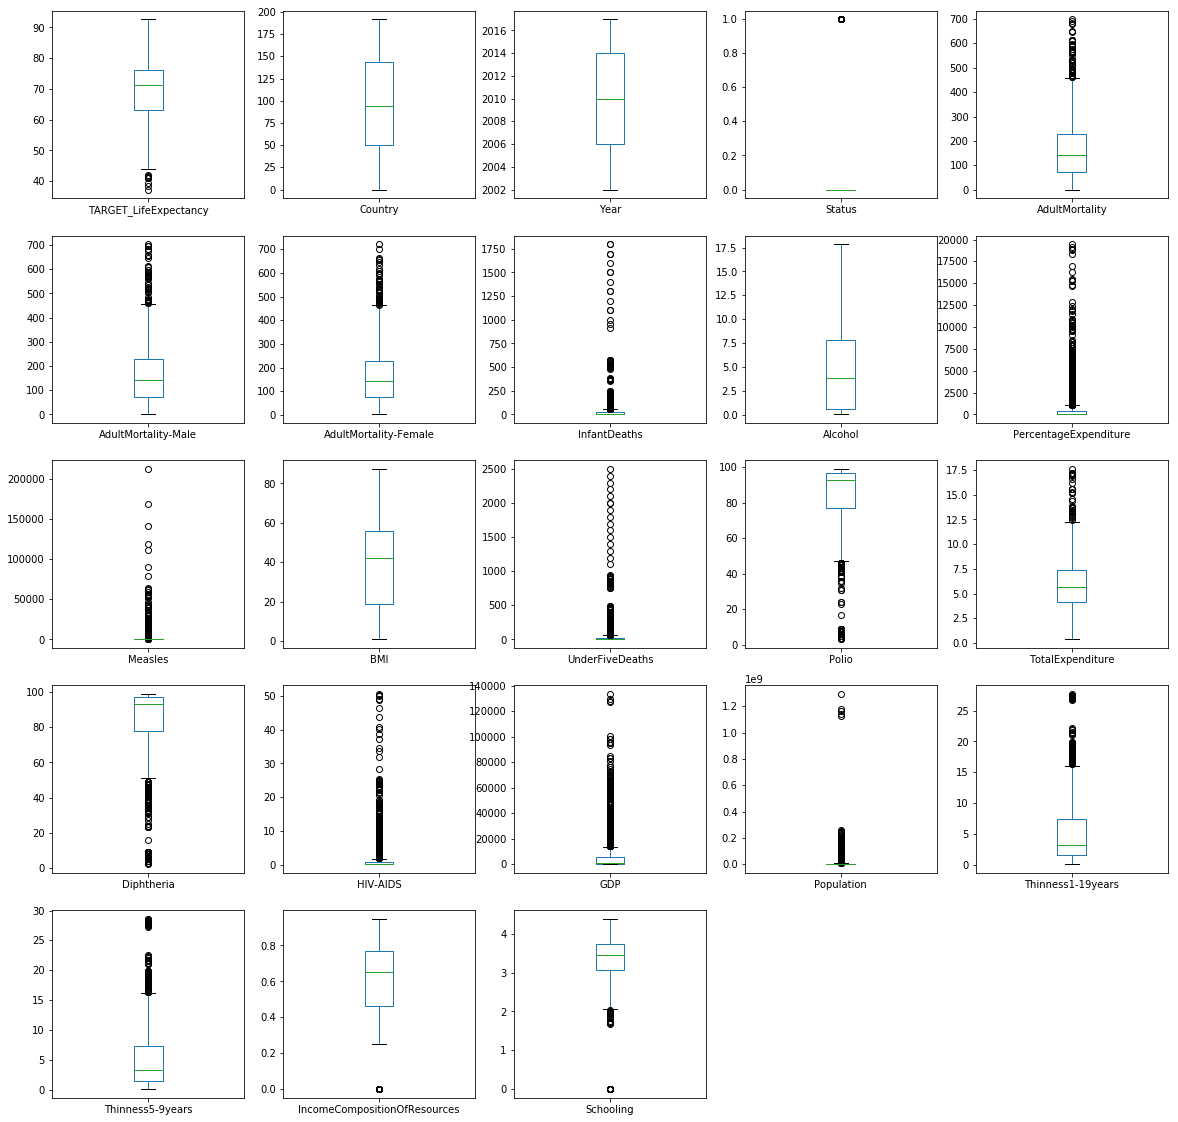

In [6]:
# BoxPlot to check the outlier 

life_expectancy_train_file.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


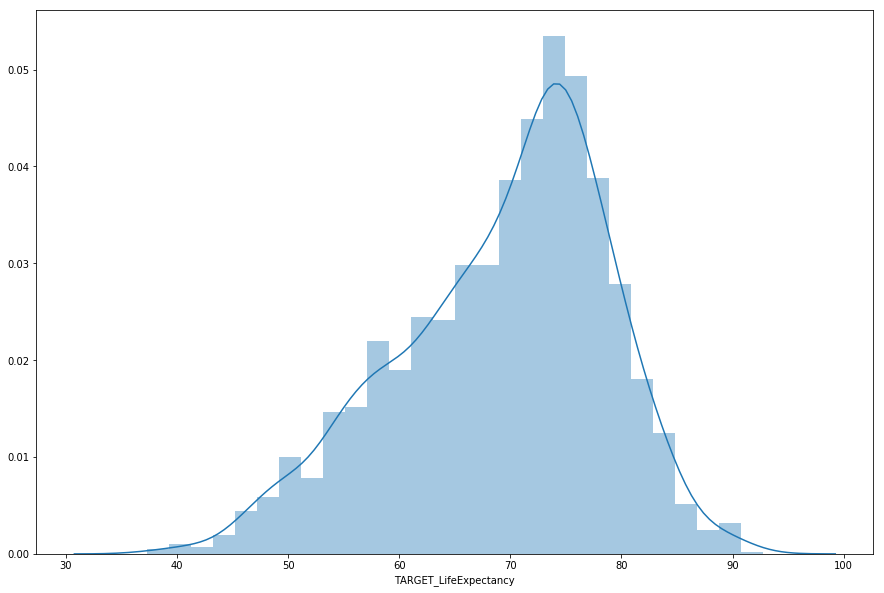

In [7]:
#Checking the average age in the target column using density plot

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(life_expectancy_train_file['TARGET_LifeExpectancy'])

### Scatter plot checking the relatinship between all independent variables and dependent variables

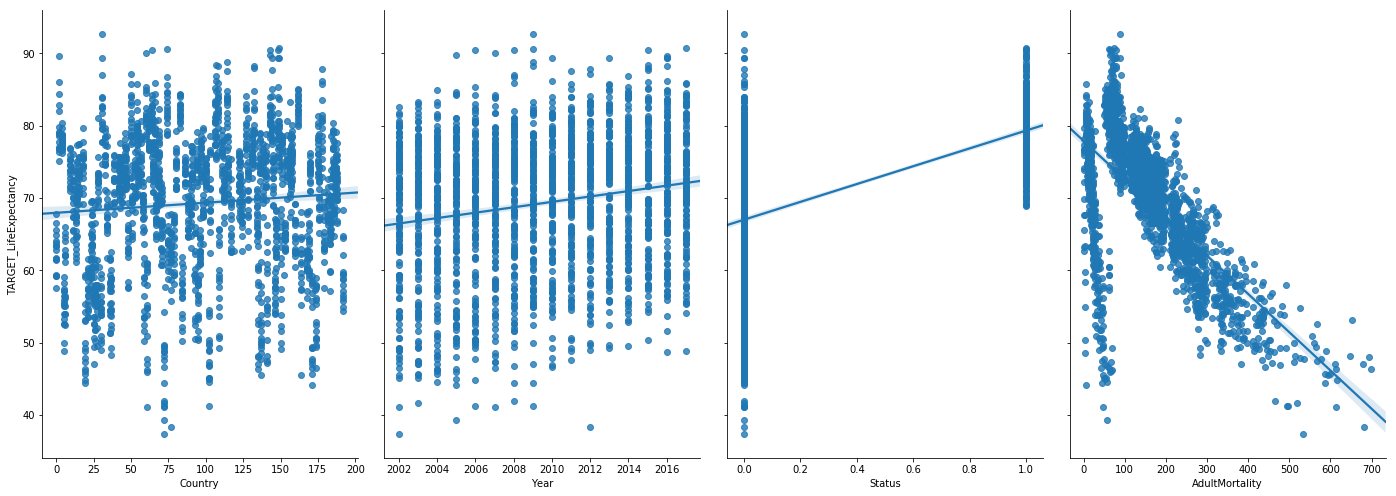

In [8]:
sns.pairplot(life_expectancy_train_file, x_vars=['Country','Year','Status','AdultMortality'], y_vars='TARGET_LifeExpectancy', size=7, aspect=0.7, kind='reg')

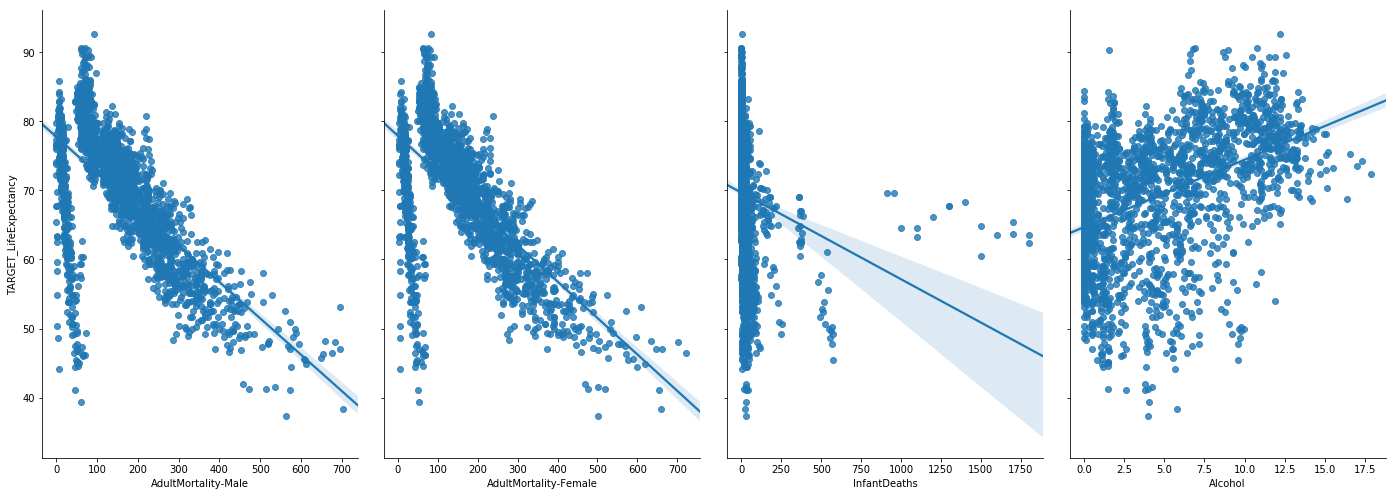

In [9]:
sns.pairplot(life_expectancy_train_file, x_vars=['AdultMortality-Male','AdultMortality-Female',
                          'InfantDeaths','Alcohol'], y_vars='TARGET_LifeExpectancy', size=7, aspect=0.7, kind='reg')

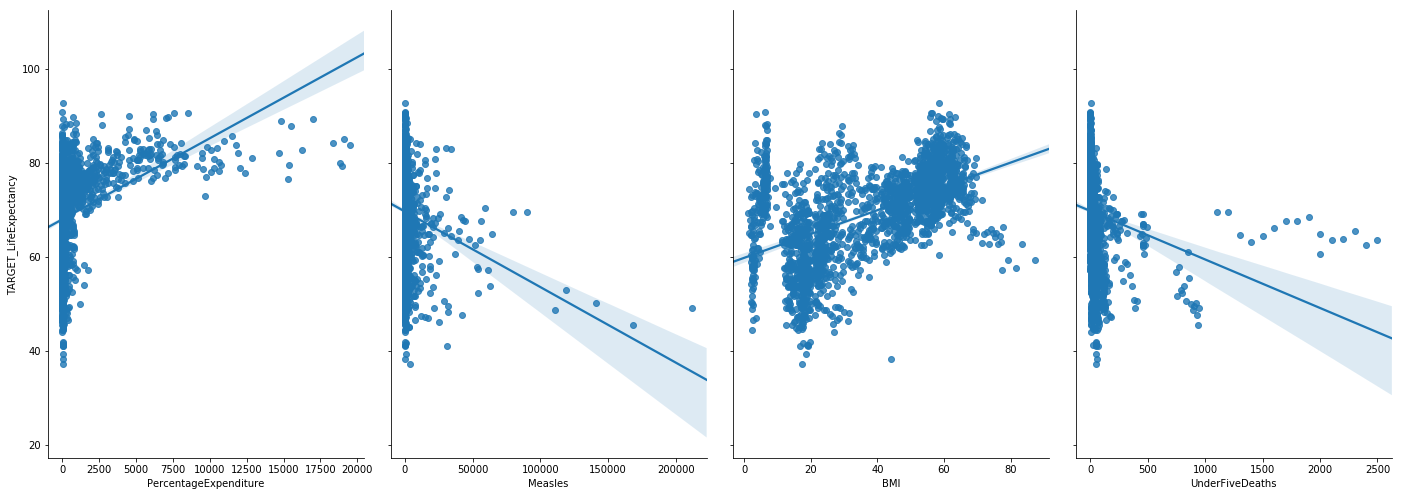

In [10]:
sns.pairplot(life_expectancy_train_file, x_vars=['PercentageExpenditure','Measles','BMI',
                          'UnderFiveDeaths'], y_vars='TARGET_LifeExpectancy', size=7, aspect=0.7, kind='reg')

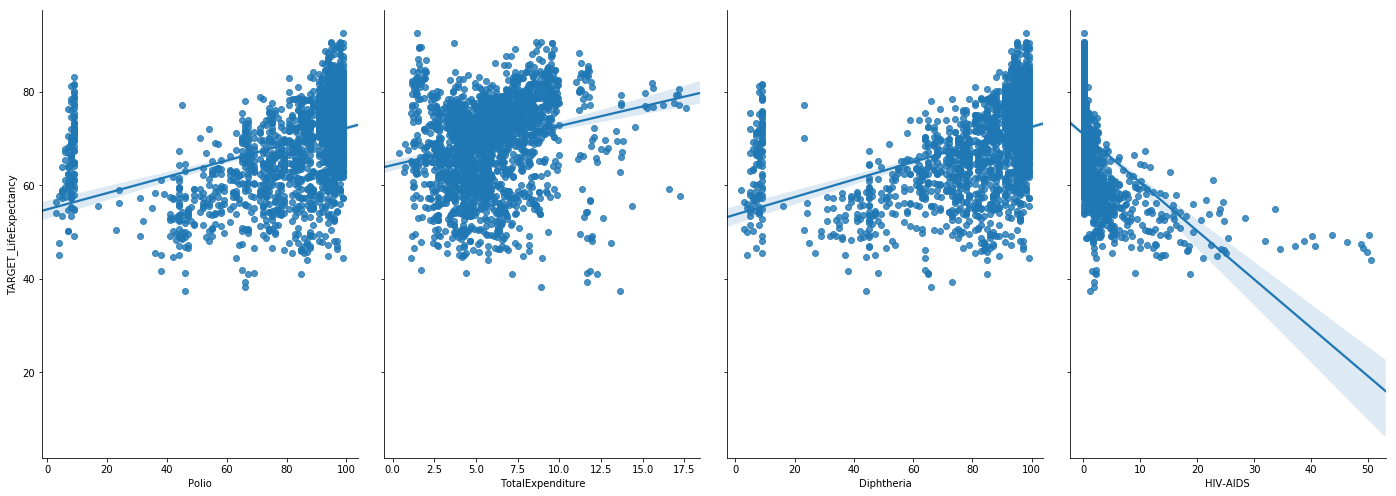

In [11]:
sns.pairplot(life_expectancy_train_file, x_vars=['Polio','TotalExpenditure','Diphtheria',
                          'HIV-AIDS'], y_vars='TARGET_LifeExpectancy', size=7, aspect=0.7, kind='reg')

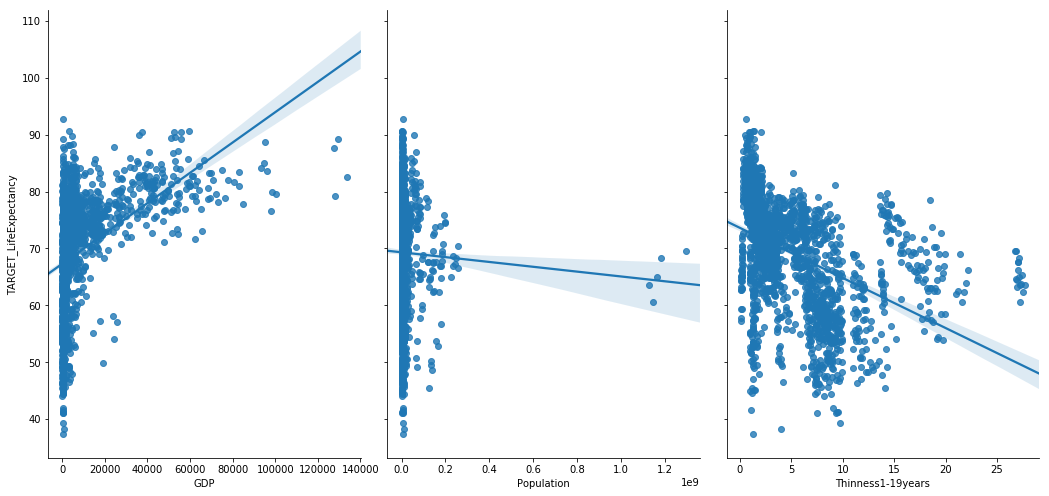

In [12]:
sns.pairplot(life_expectancy_train_file, x_vars=['GDP','Population','Thinness1-19years'], y_vars='TARGET_LifeExpectancy', size=7, aspect=0.7, kind='reg')

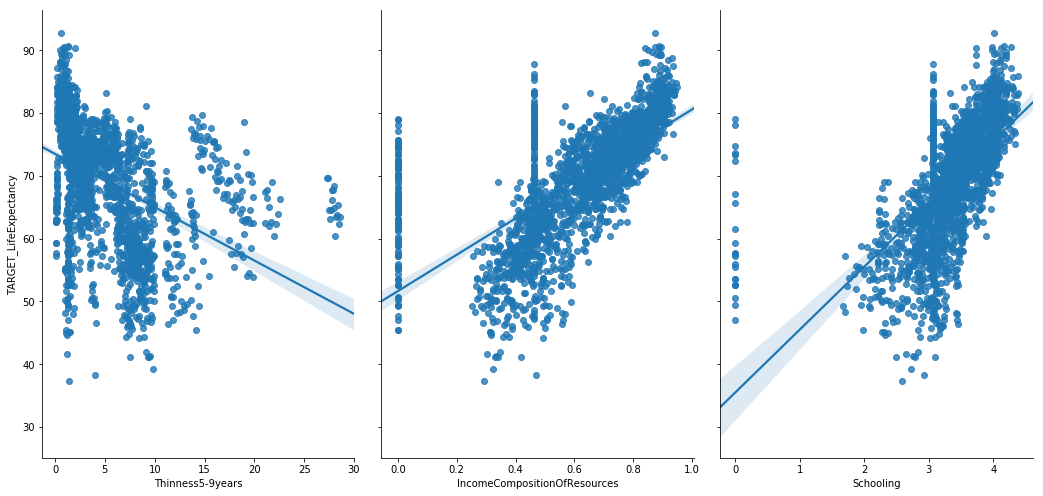

In [13]:
sns.pairplot(life_expectancy_train_file, x_vars=['Thinness5-9years', 'IncomeCompositionOfResources', 'Schooling'], y_vars='TARGET_LifeExpectancy', size=7, aspect=0.7,kind='reg')

(23.1, 0.1)

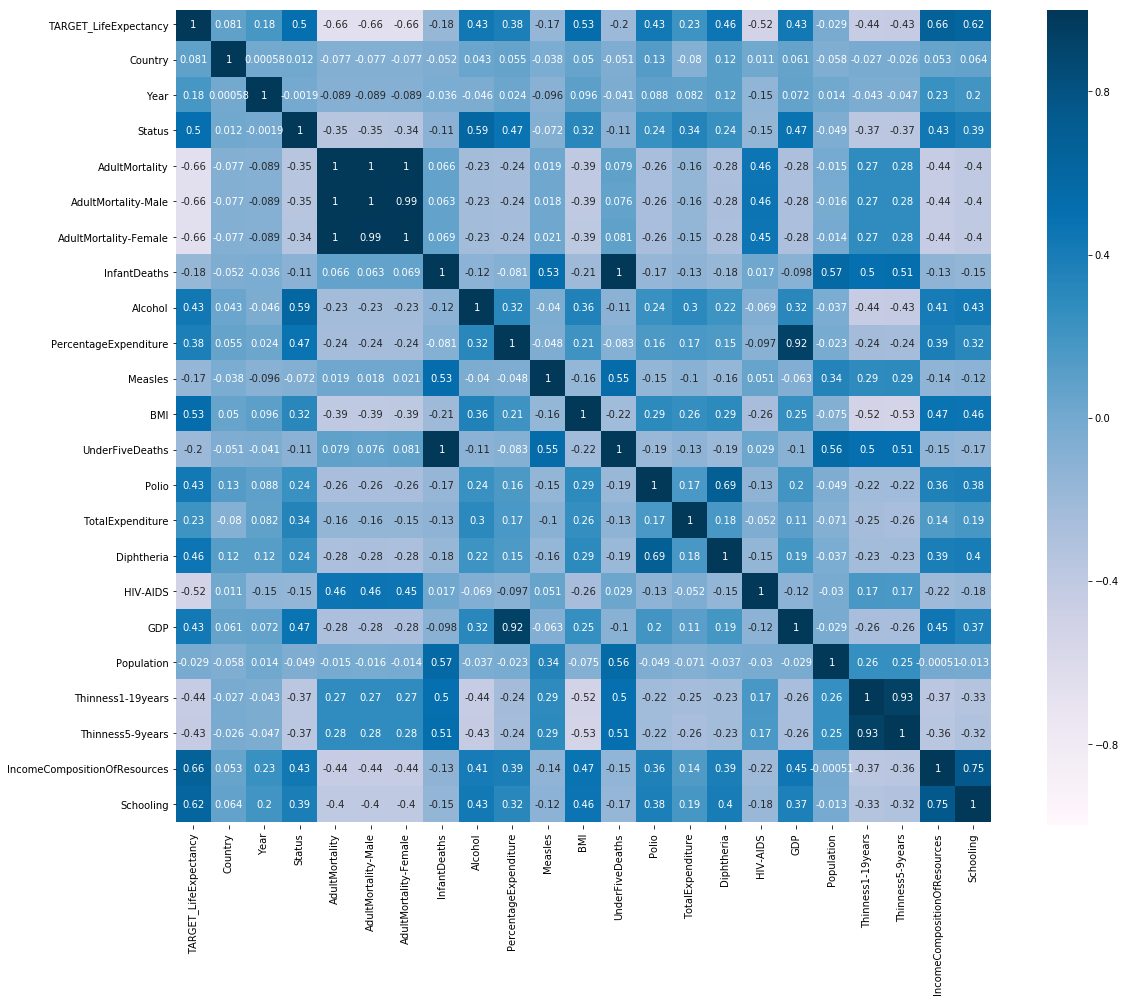

In [14]:
# checking the multicollinearity among the independent varaibles
# if the correlation between two independent variables are greater than 0.8 then that two variables are multicollinear

import seaborn as sns
correlations = life_expectancy_train_file.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap="PuBu", center=0, vmin=-1, vmax=1, square=True, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz 
b, t = plt.ylim() # discover the values for bottom and top 
b += 0.1 # Add 0.5 to the bottom
t -= t-0.1 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values 

In [15]:
#Applying Robust Scaling to the training data

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(X)

In [16]:
#converting the scaled data which is in numpy array to dataframes and Renaming the column names of that dataframe

life_scaled = pd.DataFrame(robust_scaled_df)

life_scaled.columns = ['Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling']

In [39]:
#checking for the p-values

import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     TARGET_LifeExpectancy   R-squared:                       0.758
Model:                               OLS   Adj. R-squared:                  0.756
Method:                    Least Squares   F-statistic:                     305.8
Date:                   Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                           23:00:20   Log-Likelihood:                -6127.1
No. Observations:                   2071   AIC:                         1.230e+04
Df Residuals:                       2049   BIC:                         1.242e+04
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -61.6791     47.730     -1.292      0.196    -155.284      31.925
Country                          0.0030      0.002      1.584      0.113      -0.001       0.007
Year                             0.0582      0.024      2.443      0.015       0.011       0.105
Status                           2.4749      0.375      6.606      0.000       1.740       3.210
AdultMortality                  -0.0068      0.000    -18.327      0.000      -0.008      -0.006
AdultMortality-Male             -0.0028      0.007     -0.420      0.674      -0.016       0.010
AdultMortality-Female           -0.0108      0.007     -1.601      0.110      -0.024       0.002
InfantDeaths                     0.0950      0.011      8.535      0.000       0.073       0.117
Alcohol                          0.1874      0.034      5.540      0.000       0.121       0.254
PercentageExpenditure        -5.143e-06      0.000     -0.039      0.969      -0.000       0.000
Measles                      -8.069e-06   1.32e-05     -0.612      0.540   -3.39e-05    1.78e-05
BMI                              0.0313      0.007      4.559      0.000       0.018       0.045
UnderFiveDeaths                 -0.0706      0.008     -8.636      0.000      -0.087      -0.055
Polio                            0.0199      0.006      3.174      0.002       0.008       0.032
TotalExpenditure                -0.0034      0.046     -0.074      0.941      -0.093       0.086
Diphtheria                       0.0314      0.006      4.915      0.000       0.019       0.044
HIV-AIDS                        -0.5029      0.025    -20.244      0.000      -0.552      -0.454
GDP                           4.333e-05   1.87e-05      2.318      0.021    6.67e-06       8e-05
Population                   -1.487e-09   2.03e-09     -0.733      0.464   -5.47e-09    2.49e-09
Thinness1-19years               -0.0762      0.061     -1.249      0.212      -0.196       0.043
Thinness5-9years                -0.0349      0.061     -0.575      0.565      -0.154       0.084
IncomeCompositionOfResources     6.2988      0.810      7.773      0.000       4.710       7.888
Schooling                        2.2667      0.280      8.086      0.000       1.717       2.816
==============================================================================
Omnibus:                       90.029   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.047
Skew:                          -0.229   Prob(JB):                     2.72e-48
Kurtosis:                       4.526   Cond. No.                     2.98e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covaria

### Linear Regression

In [18]:
#Splitting the value in train and test 
#Training the data using 80% of records and testing the data using 20% of records

train_x, test_x, train_y, test_y = train_test_split(life_scaled,y,test_size=0.2)

In [21]:
#creating the instance of linear regression

linreg = LinearRegression()

#Fitting the model

linreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#Predicting over the test set and calculating the error

test_pred = linreg.predict(test_x)

In [25]:
#calculating the residuals

residuals = pd.DataFrame({
    'fitted_values' : test_y,
    'predicted_values' :test_pred,
})

residuals['residuals'] = residuals['fitted_values'] - residuals['predicted_values']

fitted_vals = residuals['fitted_values']
resids = residuals['residuals']
pred = residuals['predicted_values']
#residuals.head()



[Text(0, 0.5, 'Observed'), Text(0.5, 0, 'Predicted')]

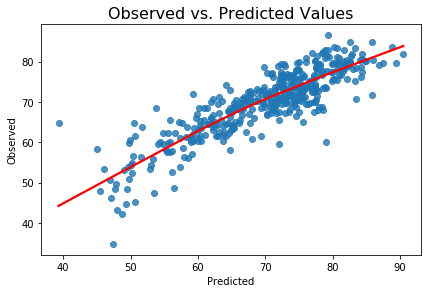

In [26]:
#plotting the observed vs predicted values

fig, (ax1) = plt.subplots(1)

plt.subplots_adjust(left  = 0.02,
right = 0.9 ,
bottom = 0.1 , 
top = 0.9 ,   
wspace = 0.2, 
hspace = 0.8 )

sns.regplot(x=fitted_vals, y=pred, lowess=True, ax=ax1, line_kws={'color': 'red'})
ax1.set_title('Observed vs. Predicted Values', fontsize=16)
ax1.set(xlabel='Predicted', ylabel='Observed')


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

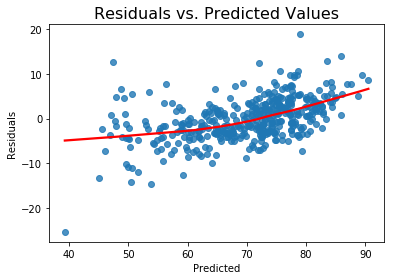

In [27]:
#plotting the residuals vs predicted values

fig, (ax2) = plt.subplots(1)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax2, line_kws={'color': 'red'})
ax2.set_title('Residuals vs. Predicted Values', fontsize=16)
ax2.set(xlabel='Predicted', ylabel='Residuals')

In [28]:
# model evaluation for testing set

rmse = (np.sqrt(mean_squared_error(test_y, test_pred)))
r2 = r2_score(test_y, test_pred)
mse = mean_squared_error(test_y, test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(test_y,test_pred))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(train_y)-1)/(len(train_y)-life_scaled.shape[1]-1)))

The model performance for testing set
--------------------------------------
Mean Absolute Error :  3.7179823053516325
MSE score is 22.961649467126414
RMSE is 4.791831535762334
R2 score is 0.7488544556093262
Adjusted R2 score is 0.7454709883854469


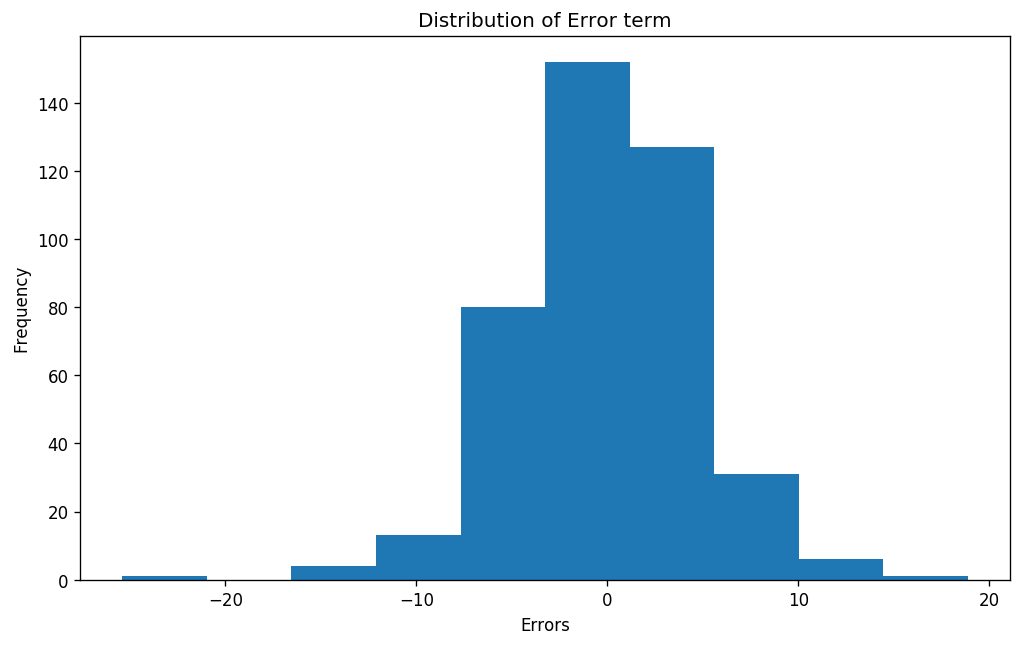

In [29]:
# Checking distribution of residuals

plt.figure(figsize=(10, 6), dpi=120, facecolor='w',edgecolor='b')
plt.hist(residuals.residuals)
plt.xlabel("Errors")
plt.ylabel("Frequency")
plt.title("Distribution of Error term")
plt.show()

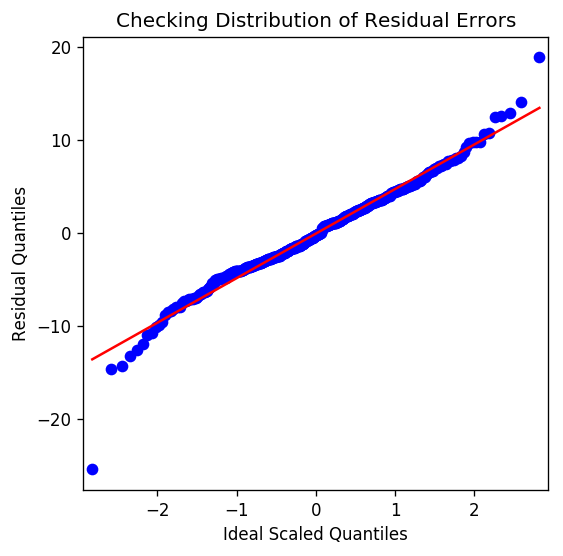

In [30]:
# Plotting q-q plot for cheking the normality distribution

from statsmodels.graphics.gofplots import qqplot

fig,ax = plt.subplots(figsize=(5,5), dpi=120)
qqplot(residuals.residuals, line='s', ax=ax)
plt.xlabel("Ideal Scaled Quantiles")
plt.ylabel("Residual Quantiles")
plt.title("Checking Distribution of Residual Errors")
plt.show()

In [31]:
#Coefficients of the columns

feature_cols = ['Country', 'Year', 'Status', 'AdultMortality',
      'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
        'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
        'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
        'Population', 'Thinness1-19years', 'Thinness5-9years',
        'IncomeCompositionOfResources', 'Schooling']

list(zip(feature_cols, linreg.coef_))

[('Country', 0.3163736821184459),
 ('Year', 0.5567940361060524),
 ('Status', 2.286283370784508),
 ('AdultMortality', -1.0838736781941778),
 ('AdultMortality-Male', -0.967266866241924),
 ('AdultMortality-Female', -1.1850897146317285),
 ('InfantDeaths', 2.0161328440717208),
 ('Alcohol', 1.4802424800852036),
 ('PercentageExpenditure', -0.029274922780202307),
 ('Measles', -0.004599129459687816),
 ('BMI', 1.1367513450869817),
 ('UnderFiveDeaths', -1.8284311918883016),
 ('Polio', 0.4003008583605802),
 ('TotalExpenditure', -0.0470877920199166),
 ('Diphtheria', 0.5774425959023416),
 ('HIV-AIDS', -0.3504983657438453),
 ('GDP', 0.2954876887400348),
 ('Population', -0.009694951361106862),
 ('Thinness1-19years', -0.36446271766748256),
 ('Thinness5-9years', -0.31951604741552586),
 ('IncomeCompositionOfResources', 1.999507496662302),
 ('Schooling', 1.3928370895367406)]

### Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(train_x)
test_poly = polynomial_features.fit_transform(test_x)

model = LinearRegression()
model.fit(x_poly, train_y)
y_poly_pred = model.predict(test_poly)

rmse = np.sqrt(mean_squared_error(test_y,y_poly_pred))
r2 = r2_score(test_y,y_poly_pred)
print("Mean Squared Error : ",metrics.mean_squared_error(test_y,y_poly_pred))
print("Root Mean Squared Error : ",rmse)
print("R-Squared : ",r2)
print("Mean Absolute Error : ",metrics.mean_absolute_error(test_y,y_poly_pred))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(train_y)-1)/(len(train_y)-x_poly.shape[1]-1)))

Mean Squared Error :  15.715511777139485
Root Mean Squared Error :  3.9642794776780668
R-Squared :  0.828109876587987
Mean Absolute Error :  2.859955674393221
Adjusted R2 score is 0.7937069222285122


In [33]:
#Performing k-fold cross validationa

from sklearn import model_selection
number_splits = 10
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

In [34]:
lRegPara = np.linspace(0.001,.5,num=20)

MSE :  4.291955181011054
rmse :  18.420879275807625
r2:  0.7966036356499309
Adjusted R2 score is 0.7612303548933971


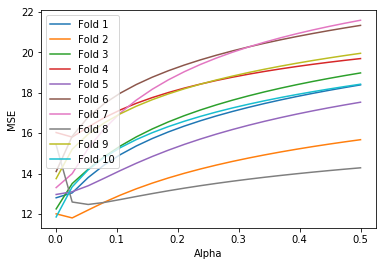

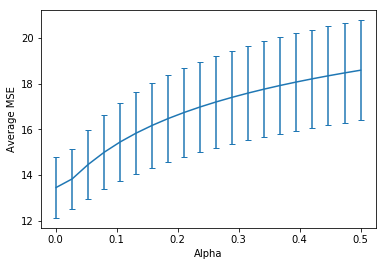

In [35]:
#Ridge Regression with Linear model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X):
# Get the training and validation data
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(y.loc[validIndex])
# This is where you're polynomial model is used!
    polyFeat = PolynomialFeatures(degree=2)
    polyFitTrainX = polyFeat.fit_transform(trainX)
    polyFitValidX = polyFeat.fit_transform(validX)
    for j , regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY, predY)
        lResults[nsplit, j] = (mse)
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")
rmse = mean_squared_error(validY, predY)
mse = np.sqrt(mean_squared_error(validY, predY))
r2 = r2_score(validY, predY)
print("MSE : ", mse)
print("rmse : ", rmse)
print("r2: ", r2)
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(trainY)-1)/(len(trainY)-polyFitTrainX.shape[1]-1)))

In [36]:
from sklearn.metrics import mean_squared_error
trainX, validX, trainY, validY = model_selection.train_test_split(X, y, test_size=0.20)

# #Scaling the model

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()

robust_scaled_df_train = scaler.fit_transform(trainX)

robust_scaled_df_test = scaler.fit_transform(validX)

life_scaled_train = pd.DataFrame(robust_scaled_df_train)
life_scaled_train.columns = ['Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling']


life_scaled_test = pd.DataFrame(robust_scaled_df_test)
life_scaled_test.columns = ['Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling']

In [37]:
polyFitTrainX = polyFeat.fit_transform(life_scaled_train)
polyFitValidX = polyFeat.fit_transform(life_scaled_test)

RidgeReg = linear_model.Ridge(alpha=0.03, normalize=True)
RidgeReg.fit(polyFitTrainX, trainY)
predY = RidgeReg.predict(polyFitValidX)

mse = mean_squared_error(validY, predY)
rmse = np.sqrt(mean_squared_error(validY, predY))
r2 = r2_score(validY, predY)

print("MSE : ", mse)
print("Mean Absolute Error : ",metrics.mean_absolute_error(validY,predY))
print("R-Squared : ", r2)
print("RMSE : ", rmse)
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(trainY)-1)/(len(trainY)-polyFitTrainX.shape[1]-1)))

MSE :  13.982806853678294
Mean Absolute Error :  2.9083545035994027
R-Squared :  0.8385761687047208
RMSE :  3.7393591501323185
Adjusted R2 score is 0.8062679907224894


In [38]:
#Lasso Regression with linear model

LassoReg = linear_model.Lasso(alpha=0.03, normalize=True)
LassoReg.fit(polyFitTrainX, trainY)
predY = LassoReg.predict(polyFitValidX)
rmse = mean_squared_error(validY, predY)
mse = np.sqrt(mean_squared_error(validY, predY))
r2 = r2_score(validY, predY)
print("MSE : ", mse)
print("Mean Absolute Error : ",metrics.mean_absolute_error(validY,predY))
print("rmse : ", rmse)
print("r2 :", r2)
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(trainY)-1)/(len(trainY)-polyFitTrainX.shape[1]-1)))
# coef = pd.Series(np.squeeze(LassoReg.coef_), index = X.columns)
# imp_coef = coef.sort_values()
# imp_coef.plot(kind = "barh")
# plt.title("Feature importance using Lasso Linear Model")
# plt.show()

MSE :  4.745913617241343
Mean Absolute Error :  3.738922885840519
rmse :  22.523696062316812
r2 : 0.7399762900713222
Adjusted R2 score is 0.6879338361624643


### Applying Ridge Regression to test.csv

In [70]:
#reading the data from the file

life_expectancy_test_file = pd.read_csv("s3://rmit-ml-2020s1-lab-data/Assignment1_data/test.csv")

In [71]:
life_expectancy_test_file.head()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


In [72]:
#dropping the id column

life_expectancy_test_file = life_expectancy_test_file.drop(['ID'], axis=1)

In [73]:
#Assigning the values to train and test

trainX = X
trainY = y
testX = life_expectancy_test_file

In [78]:
#Checking the shape of the training and testing set

print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(2071, 22)
(2071,)
(867, 22)


In [81]:
#Scaling the model using Robust Scalar method

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()

robust_scaled_df_train = scaler.fit_transform(trainX)

robust_scaled_df_test = scaler.fit_transform(testX)

life_scaled_train = pd.DataFrame(robust_scaled_df_train)
life_scaled_train.columns = ['Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling']


life_scaled_test = pd.DataFrame(robust_scaled_df_test)
life_scaled_test.columns = ['Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI', 'UnderFiveDeaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness1-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling']

In [82]:
#Fitting the data into the ridge regression model using alpha=0.03

polyFitTrainX = polyFeat.fit_transform(life_scaled_train)
polyFitValidX = polyFeat.fit_transform(life_scaled_test)

RidgeReg = linear_model.Ridge(alpha=0.03, normalize=True)
RidgeReg.fit(polyFitTrainX, trainY)
predY = RidgeReg.predict(polyFitValidX)

print(predY)

[59.79385873 56.61920929 56.66242344 56.41802496 55.92367982 54.74169699
 55.07586285 54.7585267  54.90589058 53.01543041 53.92938027 58.02068305
 58.05330766 56.57319434 56.67866848 55.67328799 82.79583438 83.73379944
 84.10787366 84.05410534 82.63272529 82.48633338 82.35653461 82.24897392
 82.84045704 82.14082079 82.43321861 84.08456594 83.5087988  81.70896851
 81.32887784 80.2180502  74.05305893 77.33632739 77.19645622 76.16930907
 78.35258557 74.96537362 75.24488647 77.89222921 77.67272536 77.17177871
 77.25165615 76.81218233 76.58698251 76.80187961 74.50825298 73.28708968
 76.46775451 78.23747444 75.64860623 75.65950675 75.51932998 75.20866367
 75.25352842 74.52649613 74.49460464 74.29727383 73.71299167 73.30617226
 72.39888593 74.96045033 72.19888685 80.61916682 71.64476652 72.02769083
 71.52106944 71.69501649 71.04595901 74.64336666 73.9912718  69.63081408
 69.07268364 68.82093824 68.72934832 68.24904982 71.91706457 67.56754341
 67.05151015 66.58463339 75.48305568 75.82652528 75

In [83]:
#converting the numpy array in dataframe

data = pd.DataFrame(predY)

In [84]:
#changing the name of the column 

data.columns = ['TARGET_LifeExpectancy']

In [85]:
#converting the dataframe to csv file

data.to_csv('s3751555_test.csv')